In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data/auto-mpg.csv", header=None)
df.columns = [
    "mpg", "cylinders", "displacement", "horsepower",
    "weight", "acceleration", "model year", "origin", "name"
]
df.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [2]:
#데이터 탐색
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [4]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [5]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
name            0
dtype: int64

In [7]:
df.duplicated().sum()

0

C:\Users\123cl\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\123cl\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\123cl\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\123cl\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning

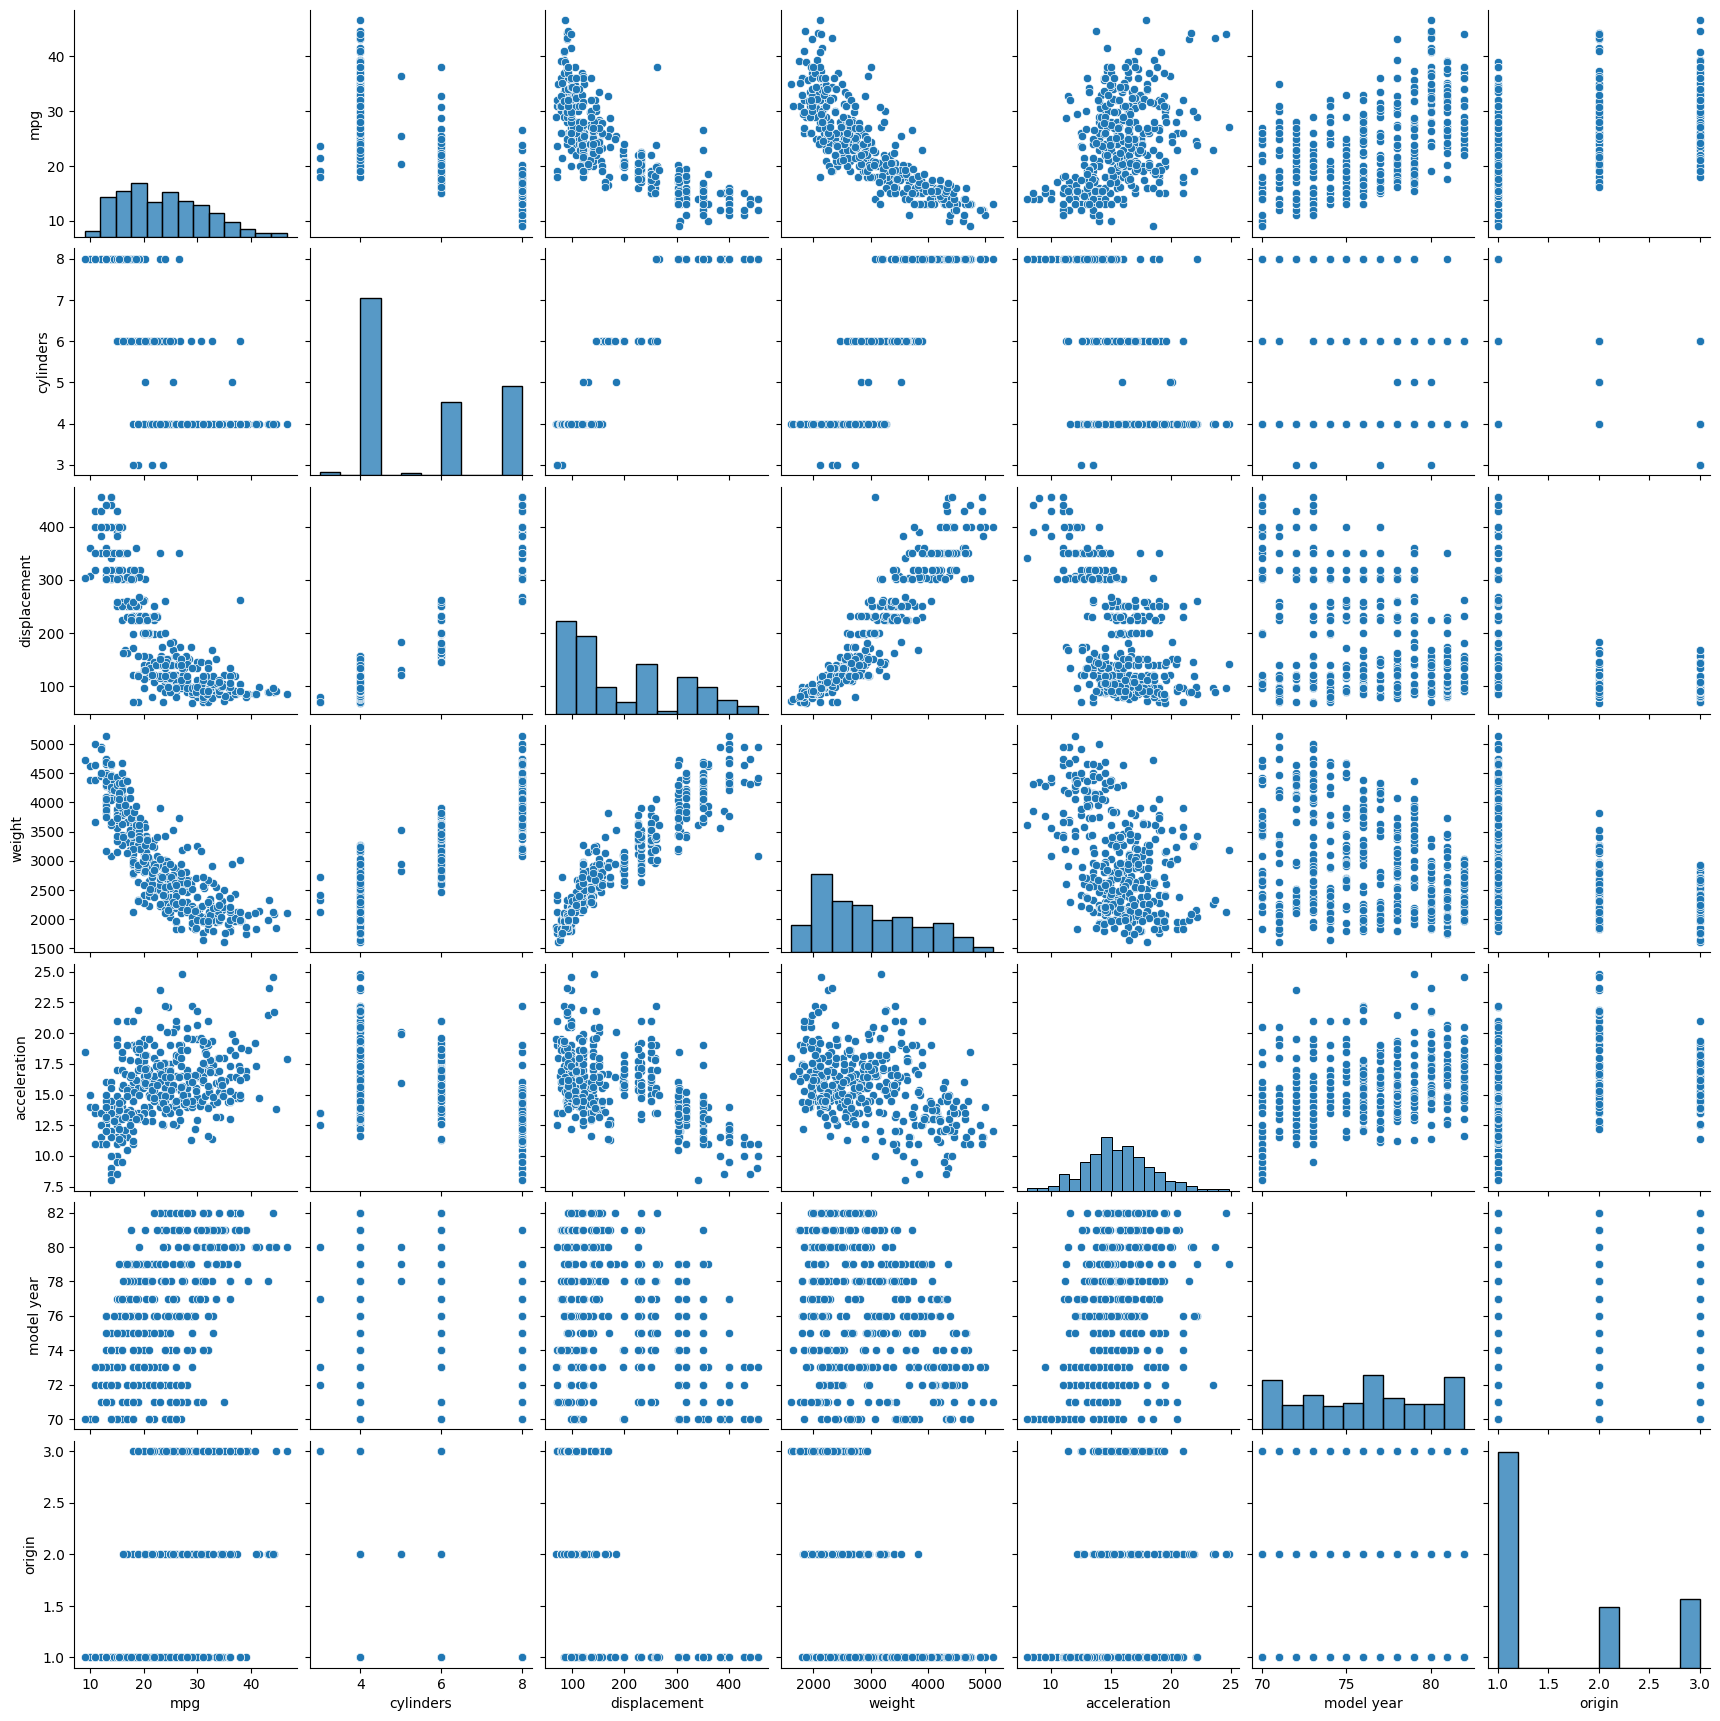

In [9]:
sns.pairplot(df);

#일부 변수 사이에 강한 선형관계 확인

In [10]:
corr=df.corr(numeric_only=True)
corr

,mpg,cylinders,displacement,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000


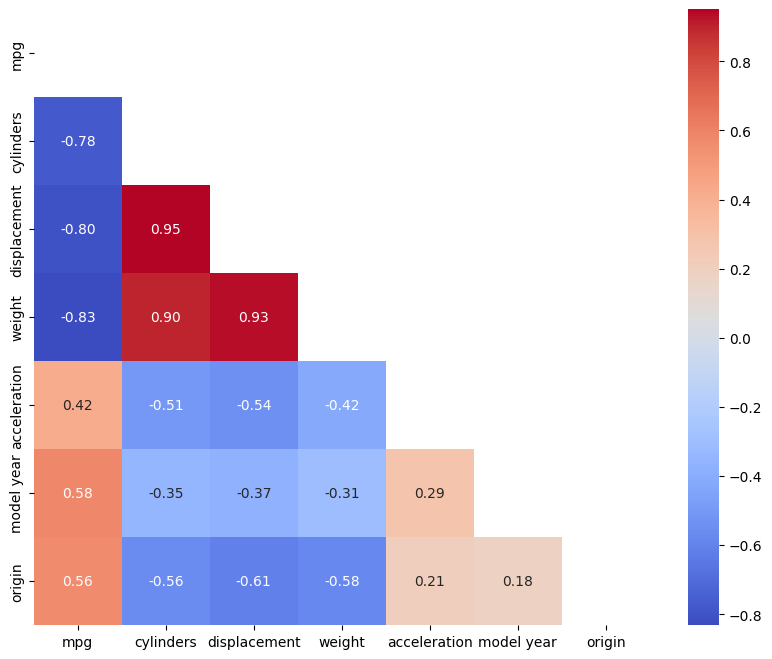

In [12]:
mask=np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(10, 8))
sns.heatmap(corr, mask=mask, cmap='coolwarm',
           annot=True, fmt=".2f", cbar=True, square=True)
plt.show()

#강한 양의 상관관계
    #displacement-cylinders, weight-displacement

In [13]:
#데이터 전처리
df['horsepower'].unique()

#누락 데이터, dtype=object

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [14]:
df['horsepower']=df['horsepower'].replace('?', np.nan)
df['horsepower']=df['horsepower'].astype('float')

df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [15]:
#결측치 제거
print(df['horsepower'].isnull().sum())
df_nan=df.dropna(subset=['horsepower'], axis=0) #열
print(df_nan['horsepower']. isnull().sum())

6
0


In [18]:
#결측치 대치
df['horsepower']=df['horsepower'].fillna(df['horsepower'].mean())
print(df['horsepower'].isnull().sum())

0


In [19]:
corr=df.corr(numeric_only=True)
corr

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.771437,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.838939,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.893646,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.771437,0.838939,0.893646,1.000000,0.860574,-0.684259,-0.411651,-0.453669
weight,-0.831741,0.896017,0.932824,0.860574,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.684259,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.411651,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.453669,-0.581024,0.205873,0.180662,1.000000


In [20]:
#1. 단순회귀분석
#변수 선택
    #종속변수: mpg
    #독립변수: cylinders, horsepower, weight

ndf=df[['mpg', 'cylinders', 'horsepower', 'weight']]
ndf.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504.0
1,15.0,8,165.0,3693.0
2,18.0,8,150.0,3436.0
3,16.0,8,150.0,3433.0
4,17.0,8,140.0,3449.0


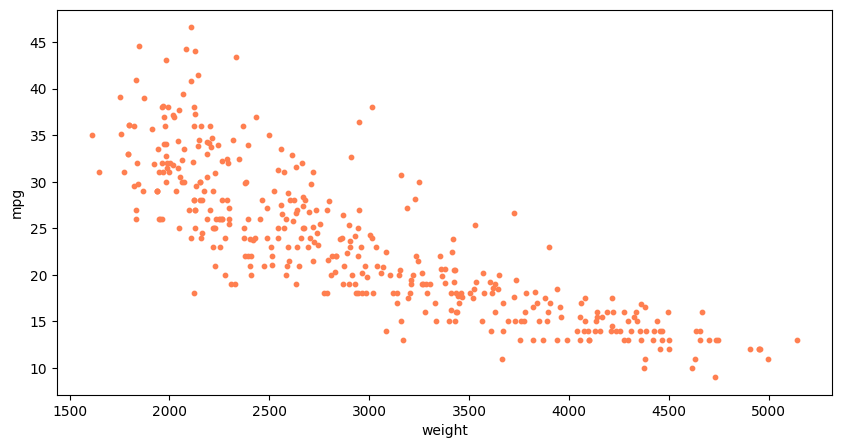

In [21]:
ndf.plot(kind='scatter', x='weight', y='mpg', c='coral',
        s=10, figsize=(10, 5))
plt.show()

In [22]:
#훈련/검증 데이터 분할
X=ndf[['weight']]
y=ndf['mpg']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,
                                                 y,
                                                 test_size=0.3,
                                                 random_state=10)
print('train data 개수: ', len(X_train))
print('test data 개수: ', len(X_test))

train data 개수:  278
test data 개수:  120


In [24]:
#모델 학습 및 검증
from sklearn.linear_model import LinearRegression

lr=LinearRegression()

lr.fit(X_train, y_train)

r_square=lr.score(X_test, y_test)
print('R^2 결정계수: ', r_square)

R^2 결정계수:  0.689363809315209


In [25]:
print('기울기 a: ', lr.coef_)
print('y절편 b: ', lr.intercept_)

기울기 a:  [-0.0076554]
y절편 b:  46.60365052224634


In [27]:
y_hat=lr.predict(X_test) #모델이 반환한 예측값

#오차 계산
test_preds=pd.DataFrame(y_test)
test_preds.columns=['y_test']
test_preds['y_hat']=y_hat
test_preds['squared_error']=(test_preds['y_hat']-test_preds['y_test'])**2
test_preds

,y_test,y_hat,squared_error
331,33.8,30.182824,13.083965
111,18.0,30.343587,152.364137
350,34.7,29.646946,25.533357
205,28.0,30.106270,4.436372
56,26.0,31.637349,31.779704
...,...,...,...
17,21.0,26.799138,33.630001
225,17.5,19.656652,4.651150
223,15.5,14.910306,0.347739
59,23.0,29.348385,40.301995


In [28]:
mse=test_preds['squared_error'].mean()
print('mse: ', mse)

mse:  17.898336128759958


C:\Users\123cl\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


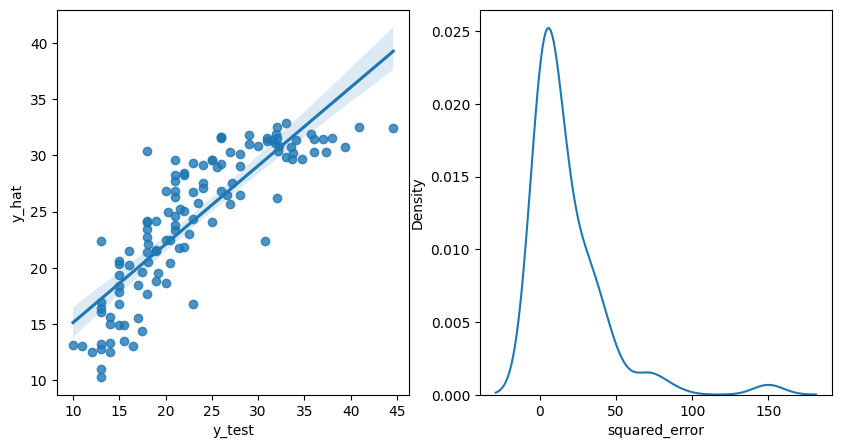

In [29]:
#오차 분석
fig, axes=plt.subplots(1, 2, figsize=(10, 5))
sns.regplot (x='y_test', y='y_hat', data=test_preds, ax=axes[0]);
sns.kdeplot(x='squared_error', data=test_preds, ax=axes[1]);

#데이터 포인트가 회귀선 주위에 가까이 있을 떄 모델의 예측이 정확하다
#연비가 낮거나 높은 구간 > 실제 값보다 작게 예측
#연비가 중간수준 > 실제 값보다 크게 예측

#커널밀도그래프 > 예측 오차의 분포 시각화
    #정규분포에 가까울수록 모델의 성능이 좋다
    #오차가 0 주위에 집중되어 있는가
#대부분 0 주위에 집중되어 있지만, 이상치 존재

#산점도를 보았을때 곡선의 형태 > 직선으로 설명하는 단순선형회귀보다 곡선을 표현하는 모델을 선택하는 것이 좋다

In [30]:
#2. 다항회귀분석

X_train, X_test, y_train, y_test=train_test_split(X,
                                                 y,
                                                 test_size=0.3,
                                                 random_state=10)
print('훈련 데이터: ', X_train.shape)
print('검증 데이터: ', X_test.shape)

훈련 데이터:  (278, 1)
검증 데이터:  (120, 1)


In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures #다항식 변환

poly=PolynomialFeatures(degree=2) #2차항 적용
X_train_poly=poly.transform(X_train) #X_train을 2차항으로 변형

print('원본 데이터: ', X_train.shape)
print('2차항 변환 데이터: ', X_train_poly.shape)

#독립변수에 대해 [1, x, x^2]와 같이 3개의 트성으로 변환됨
    #[상수항, 원래의 특성, 원래 특성의 제곱]

원본 데이터:  (278, 1)
2차항 변환 데이터:  (278, 3)


In [34]:
pr=LinearRegression()
pr.fit(X_train_poly, y_train)

X_test_poly=poly.fit_transform(X_test) #X_test 데이터를 2차항으로 변형
r_square=pr.score(X_test_poly, y_test)
print('R^2 결정계수: ', r_square)

#단순회귀분석일 때보다 모델 예측력 개선됨

R^2 결정계수:  0.7255470154177007


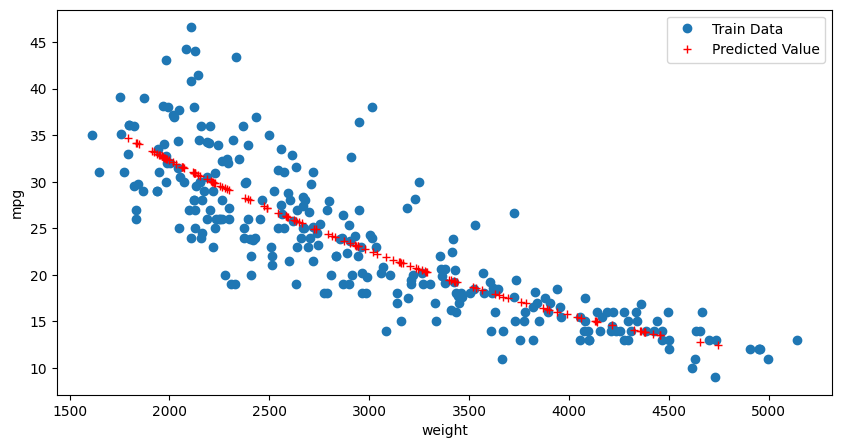

In [36]:
y_hat_test=pr.predict(X_test_poly)

fig, axes=plt.subplots(figsize=(10, 5))
axes.plot(X_train, y_train, 'o', label='Train Data')
axes.plot(X_test, y_hat_test, 'r+', label='Predicted Value')
axes.legend(loc='best')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()

#직선으로 표시된 단순회귀분석에 비해 데이터의 패턴을 더 잘 설명한다

In [37]:
X_poly=poly.fit_transform(X_test)

test_preds=pd.DataFrame(y_test)
test_preds.columns=['y_test']
test_preds['y_hat']=y_hat_test
test_preds['squared_error']=(test_preds['y_hat']-test_preds['y_test'])**2

mse=test_preds['squared_error'].mean()
print('mse: ', mse)

#mse가 감소함 > 결정계수가 개선되었다

mse:  15.813520500513508


In [38]:
from sklearn.metrics import mean_squared_error

mse=mean_squared_error(y_test, y_hat_test)
print('mse: ', mse)

mse:  15.813520500513508


In [39]:
from sklearn.metrics import mean_absolute_error

mae=mean_absolute_error(y_test, y_hat_test)
print('mae: ', mae)

mae:  3.1405650734449524


C:\Users\123cl\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


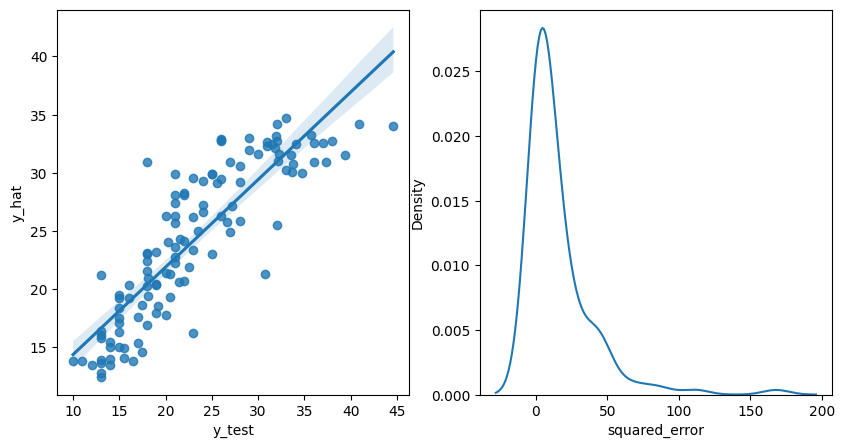

In [40]:
fig, axes=plt.subplots(1, 2, figsize=(10, 5))
sns.regplot(x='y_test', y='y_hat', data=test_preds, ax=axes[0]);
sns.kdeplot(x='squared_error', data=test_preds, ax=axes[1]);

#평가지표는 개선되었지만 시각화에서 크게 두드러지는 점은 없음
#오차 분포에서 200까지 위치하는 점을 보아 특정 데이터에서는 예측력이 떨어짐

In [42]:
#3. 다중회귀분석
X=ndf[['cylinders', 'horsepower', 'weight']]
y=ndf['mpg']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,
                                                 y,
                                                 test_size=0.3,
                                                 random_state=10)
print('훈련 데이터: ', X_train.shape)
print('검증 데이터: ', X_test.shape)

훈련 데이터:  (278, 3)
검증 데이터:  (120, 3)


In [43]:
lr=LinearRegression()

lr.fit(X_train, y_train)

r_square=lr.score(X_test, y_test)
print('R^2 결정계수: ', r_square)

#다항회귀분석에 비해 낮아져 모델의 설명력이 저하됨

R^2 결정계수:  0.6895968946794342


In [44]:
print('X 변수의 계수 a: ', lr.coef_)
print('상수항 b: ', lr.intercept_)

X 변수의 계수 a:  [-0.38212538 -0.04709428 -0.00514076]
상수항 b:  46.09948474328229


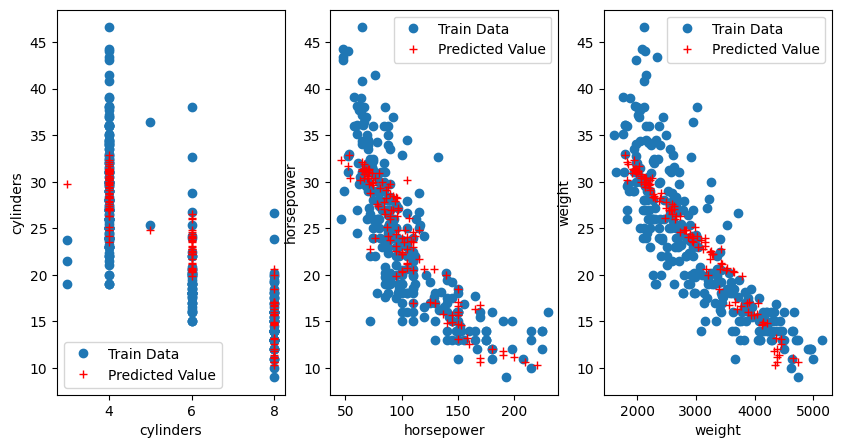

In [45]:
y_hat_test=lr.predict(X_test)

fig, axes=plt.subplots(1, 3, figsize=(10, 5))

for i, col in enumerate (X_test.columns):
    axes[i].plot(X_train[col], y_train, 'o', label='Train Data') #데이터 분포
    axes[i].plot(X_test[col], y_hat_test, 'r+', label='Predicted Value')
    
    axes[i].set_xlabel(col)
    axes[i].set_ylabel(col)
    axes[i].legend(loc='best')
plt.show()

# 2번째의 경우, 회귀선이 직선이 아닌 모습
#단순선형회귀보다 더 복잡한 관계 설명 가능하다

In [46]:
mse=mean_squared_error(y_test, y_hat_test)
print('mse: ', np.round(mse, 2))

mae=mean_absolute_error(y_test, y_hat_test)
print('mae: ',np.round(mae, 2))

#전체적으로 값이 커져 다항회귀분석 때 대비 모델 예측 성능이 나빠짐

mse:  17.88
mae:  3.33
